# project 1 : Classification empirical study

| name | Student number |
|----------------|-------------------|
| Achraf Rachek   | 300144667   |
| Mohammed Riyad El azhari | 300145946 |

## 1. Understand the classification task for your dataset:

In [107]:
#TO-DO

## 2. Analyze your dataset

In [108]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import Normalizer
df = pd.read_csv('./smoke_detection_iot.csv')

In [109]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [110]:
len(df)

62630

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [112]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


## 3. Brainstorm about the attributes (Feature engineering)

<p> - The following code removes the first 2 feature ( index && UTC ) which are used the track data but don't don't play any role in triggering the Fire Alarm.</p>

In [113]:
df = df.iloc[: ,2:]
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## 4. Encode the features

In [114]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.utils import shuffle

df = shuffle(df)
df.reset_index(inplace=True, drop=True)
C_data = df # continuous data
transformationToDiscretObj = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
transformationToDiscretObj.fit(df)
Discrete_data = transformationToDiscretObj.transform(df)
D_data = pd.DataFrame(Discrete_data, columns = df.columns.values.tolist()) # discrete data
C_X = C_data.iloc[: , :-1]
C_Y = C_data['Fire Alarm']
D_X = D_data.iloc[: , :-1]
D_Y = D_data['Fire Alarm']
D_data.head(25)

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,2.0,2.0,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
2,2.0,1.0,1.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
5,2.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0
6,0.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
7,2.0,2.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
8,2.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
9,1.0,3.0,0.0,0.0,3.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


## Q5-6-7-9. Train/Test/Evaluate

### Model imports

---



In [115]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [116]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Model instances ( MultinomialNB, LogisticRegression, MLPClassifier)

In [117]:
G1 = MultinomialNB() 
G2 = MultinomialNB(alpha = 1.1) 
G3 = MultinomialNB(alpha = 0.9) 

In [118]:
lg1 = LogisticRegression(solver = 'saga', max_iter = 250)
lg2 = LogisticRegression(penalty='l1', C=1.1, solver = 'saga', max_iter = 250)
lg3 = LogisticRegression(penalty='l2', C=0.9, solver = 'saga', max_iter = 250)

In [119]:
MLP1 = MLPClassifier() 
MLP2 = MLPClassifier(learning_rate_init = 0.002, activation = 'logistic', alpha = 0.0005) 
MLP3 = MLPClassifier(learning_rate_init = 0.003, activation = 'tanh', alpha = 0.0009) 

### KFold data split




In [120]:
kf = KFold(n_splits=5)
C_splt_data = kf.split(C_data) # Continuous splitted data
D_splt_data = kf.split(D_data) # Discrete splitted data

### variables initialization

In [121]:
global Y_train 
global Y_validation 

### Cross-validation loop

In [122]:
# looping over the splits
for train_index, val_index in C_splt_data:

    # preparing training and validation data with continuous values
    C_X_train = C_X.iloc[train_index,:]
    C_Y_train = C_Y.iloc(axis=0)[train_index]
    C_X_validate = C_X.iloc[val_index,:]
    C_Y_validate = C_Y.iloc(axis=0)[val_index]

    # preparing training and validation data with discrete values
    D_X_train = D_X.iloc[train_index,:]
    D_Y_train = D_Y.iloc(axis=0)[train_index]
    D_X_validate = D_X.iloc[val_index,:]
    D_Y_validate = D_Y.iloc(axis=0)[val_index]

    # training with train indices --> Gaussian Naive Bayes
    G1.fit(D_X_train, D_Y_train)
    G2.fit(D_X_train, D_Y_train)
    G3.fit(D_X_train, D_Y_train)

    # training with train indices --> Logistic regression
    lg1.fit(C_X_train, C_Y_train)
    lg2.fit(C_X_train, C_Y_train)
    lg3.fit(C_X_train, C_Y_train)

    # training with train indices --> Multi-Layer perceptron
    MLP1.fit(C_X_train, C_Y_train)
    MLP2.fit(C_X_train, C_Y_train)
    MLP3.fit(C_X_train, C_Y_train)

    # predictions with validation indices --> Gaussian Naive Bayes
    G1_predict_with_validation_data = G1.predict(D_X_validate)
    G2_predict_with_validation_data = G2.predict(D_X_validate)
    G3_predict_with_validation_data = G3.predict(D_X_validate)

    # predictions with validation indices --> Logistic regression
    lg1_predict_with_validation_data = lg1.predict(C_X_validate)
    lg2_predict_with_validation_data = lg2.predict(C_X_validate)
    lg3_predict_with_validation_data = lg3.predict(C_X_validate)

    # predictions with validation indices --> Multi-Layer perceptron
    MLP1_predict_with_validation_data = MLP1.predict(C_X_validate)
    MLP2_predict_with_validation_data = MLP2.predict(C_X_validate)
    MLP3_predict_with_validation_data = MLP3.predict(C_X_validate)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

### 8- Evaluation



> metrics imports



In [123]:
from sklearn.metrics import average_precision_score, recall_score



> evaluation with precision/recall measures



#### Naive Bayes evaluation



>> Naive Bayes --> G1 model






In [124]:
G1_validation_recall = recall_score(D_Y_validate, G1_predict_with_validation_data, average='weighted')
G1_validation_precision = average_precision_score(D_Y_validate, G1_predict_with_validation_data, average='weighted', pos_label=4.0)
print(G1_validation_recall*100)
print(G1_validation_precision*100)

91.72121986268561
95.50280132093455




>> Naive Bayes --> G2 model



In [125]:
G2_validation_recall = recall_score(D_Y_validate, G2_predict_with_validation_data, average='weighted')
G2_validation_precision = average_precision_score(D_Y_validate, G2_predict_with_validation_data, average='weighted', pos_label=4.0)
print(G2_validation_recall*100)
print(G2_validation_precision*100)

91.72121986268561
95.50280132093455


>> Naive Bayes --> G2 mode

In [126]:
G3_validation_recall = recall_score(D_Y_validate, G3_predict_with_validation_data, average='weighted')
G3_validation_precision = average_precision_score(D_Y_validate, G3_predict_with_validation_data, average='weighted', pos_label=4.0)
print(G3_validation_recall*100)
print(G3_validation_precision*100)

91.72121986268561
95.50280132093455


#### Logistic regression evaluation

>> Logistic regression --> lg1 model

In [127]:
lg1_validation_recall = recall_score(C_Y_validate, lg1_predict_with_validation_data, average='weighted')
lg1_validation_precision = average_precision_score(C_Y_validate, lg1_predict_with_validation_data, average='weighted')
print(lg1_validation_recall*100)
print(lg1_validation_precision*100)

97.3495130129331
98.16406189375772


>> Logistic regression --> lg2 model

In [128]:
lg2_validation_recall = recall_score(C_Y_validate, lg2_predict_with_validation_data, average='weighted')
lg2_validation_precision = average_precision_score(C_Y_validate, lg2_predict_with_validation_data, average='weighted')
print(lg2_validation_recall*100)
print(lg2_validation_precision*100)

97.3495130129331
98.16406189375772


>> Logistic regression --> lg3 model

In [129]:
lg3_validation_recall = recall_score(C_Y_validate, lg3_predict_with_validation_data, average='weighted')
lg3_validation_precision = average_precision_score(C_Y_validate, lg3_predict_with_validation_data, average='weighted')
print(lg3_validation_recall*100)
print(lg3_validation_precision*100)

97.3495130129331
98.16406189375772


#### Multi-Layer Perceptron

>> Multi-Layer perceptron --> MLP1 model

In [130]:
MLP1_validation_recall = recall_score(C_Y_validate, MLP1_predict_with_validation_data, average='weighted')
MLP1_validation_precision = average_precision_score(C_Y_validate, MLP1_predict_with_validation_data)
print(MLP1_validation_recall*100)
print(MLP1_validation_precision*100)

98.17978604502635
97.65549199492496


>> Multi-Layer perceptron --> MLP2 model

In [131]:
MLP2_validation_recall = recall_score(C_Y_validate, MLP2_predict_with_validation_data, average='weighted')
MLP2_validation_precision = average_precision_score(C_Y_validate, MLP2_predict_with_validation_data)
print(MLP2_validation_recall*100)
print(MLP2_validation_precision*100)

96.33562190643462
97.59936477899213


>> Multi-Layer perceptron --> MLP3 model

In [132]:
MLP3_validation_recall = recall_score(C_Y_validate, MLP3_predict_with_validation_data, average='weighted')
MLP3_validation_precision = average_precision_score(C_Y_validate, MLP3_predict_with_validation_data)
print(MLP3_validation_recall*100)
print(MLP3_validation_precision*100)

88.93501516844962
87.45314970553885




# *******DRAFT*********

In [133]:
df['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
y = df[['Fire Alarm']]
X = df.drop(['Fire Alarm'], axis=1)

In [136]:
from sklearn.preprocessing import MinMaxScaler 

In [137]:
mms = MinMaxScaler()
Xnew = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,y,test_size=0.2,random_state=0)

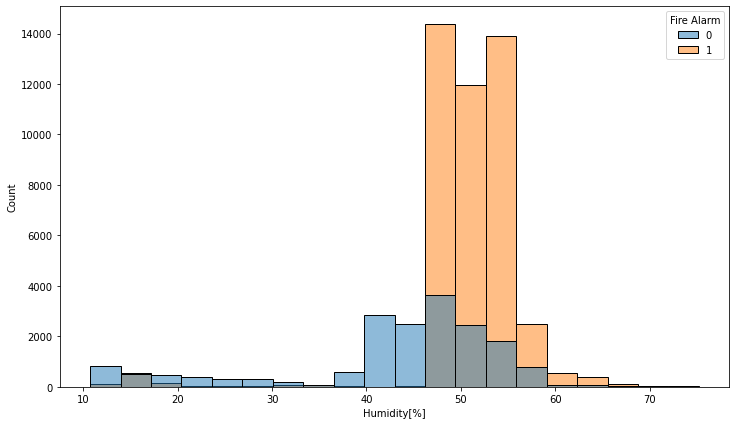

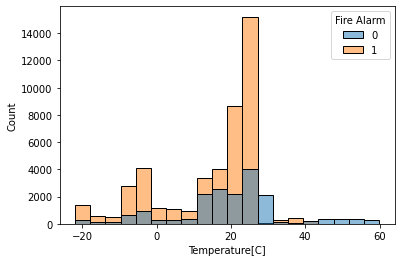

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 7))
sns.histplot(df, x = "Humidity[%]", bins = 20, hue = "Fire Alarm", )
plt.show()
sns.histplot(df, x = "Temperature[C]", bins = 20, hue = "Fire Alarm", )
plt.show()

In [141]:
from sklearn.naive_bayes import GaussianNB

In [142]:
print(ytest)

       Fire Alarm
932             1
30816           1
28607           0
10749           1
53215           1
...           ...
51848           1
2255            0
7901            1
26730           0
105             1

[12526 rows x 1 columns]


In [143]:
np.ravel(ytrain)

array([0, 0, 1, ..., 1, 1, 1])

In [144]:
NBModel = GaussianNB()
NBModel.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [145]:
y_pre = NBModel.predict(xtest)

In [146]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pre)*100

77.94188088775347

In [147]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>